# Classification Methods
____________________________

__Here we will try to get the best score for the iris data set__

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.feature_names)

dict_keys(['target_names', 'data', 'DESCR', 'target', 'feature_names'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Checking if there is equal 
# Update: Stratify parameter does the trick of equal division of classes 
pd.Series(y_train).value_counts()

2    35
1    35
0    35
dtype: int64

___________________________________
# Linear Models for Classification



## 1. Logistic Regression

*Although its name is regression , its used for Classification.It does a similar task to a linear regressor by finding the bias term and weights of a straight line that would fit the points, except that it passes the output y to logistic function.*

![Logistic Regression](images/logisticregression.png)


*The logistic regression object in scikit learn takes in a argument C which is like alpha in Lasso and Ridge i.e it controls model complexity, regularization. But it is opposite to that of alpha i.e more value of C means less regularization.*

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 50)
model.fit(X_train, y_train)
print("Accuracy score on train data : {}".format(model.score(X_train, y_train)))
print("Accuracy score on test data : {}".format(model.score(X_test, y_test)))

Accuracy score on train data : 0.9619047619047619
Accuracy score on test data : 0.9555555555555556


*Let us now look at the change of score for different values of the parameter C*

<IPython.core.display.Javascript object>


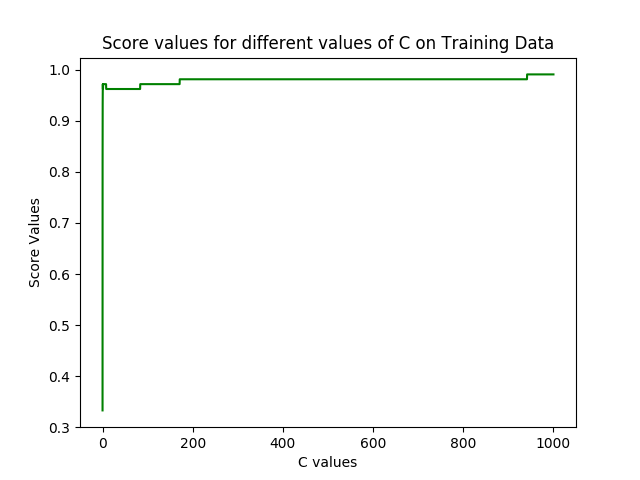

<IPython.core.display.Javascript object>


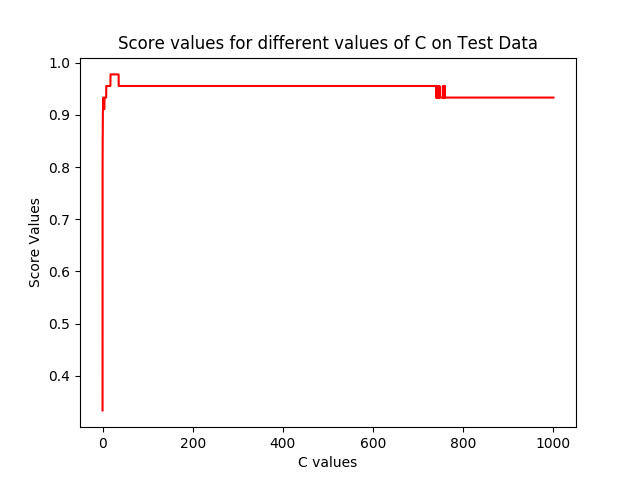

In [4]:
c_values = np.arange(0.0001, 1000, 0.1)
test_scores = []
train_scores = []

for c in c_values :
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    test_scores.append(model.score(X_test, y_test))
    train_scores.append(model.score(X_train, y_train))
    
plt.figure()
plt.title("Score values for different values of C on Training Data")
plt.xlabel("C values")
plt.ylabel("Score Values")
plt.plot(c_values, train_scores, c='g')


plt.figure()
plt.title("Score values for different values of C on Test Data")
plt.xlabel("C values")
plt.ylabel("Score Values")
plt.plot(c_values, test_scores, c='r')


**Hence from the above plot it is clear that increasing values of the C parameter tends to overfit the training data. hence it is oppositely related to that of alpha value in ridge regression.**

*Optimally for C = 25 the test score is equal to 0.97 and training score is also about 0.96. Hence choose C = 25*

*Normalizing the data improves the accuracy score, lets test this.*

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

*Let us now perform the above same procedures again*

<IPython.core.display.Javascript object>


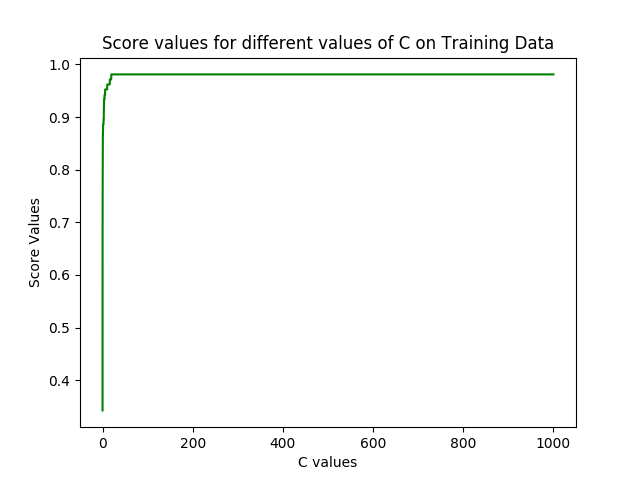

<IPython.core.display.Javascript object>


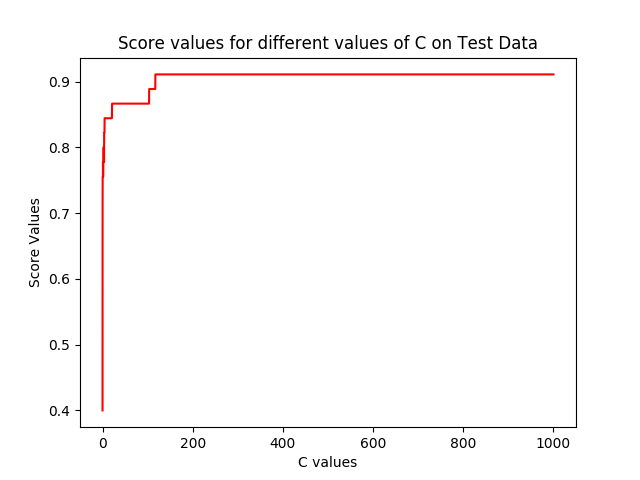

In [6]:
c_values = np.arange(0.0001, 1000, 0.1)
test_scores = []
train_scores = []

for c in c_values :
    model = LogisticRegression(C=c)
    model.fit(X_train_transformed, y_train)
    test_scores.append(model.score(X_test_transformed, y_test))
    train_scores.append(model.score(X_train_transformed, y_train))
    
plt.figure()
plt.title("Score values for different values of C on Training Data")
plt.xlabel("C values")
plt.ylabel("Score Values")
plt.plot(c_values, train_scores, c='g')


plt.figure()
plt.title("Score values for different values of C on Test Data")
plt.xlabel("C values")
plt.ylabel("Score Values")
plt.plot(c_values, test_scores, c='r')

**Here although accuracy score seems to have decreased(with both MinMaxScaler and StandardScaler), but in general its better to normalize**

## 2. Support Vector Machines (Linear SVM) for multiclass classification

![Linear Support Vector Mahines](images/supportvectormachines.png)

*It takes the dot products of the weights (which are obtained from fitting) and the coordinates of the point on which prediction is to be made, and adds the bias term. It than takes the sign of the final value for final binary classification.*  

<IPython.core.display.Javascript object>


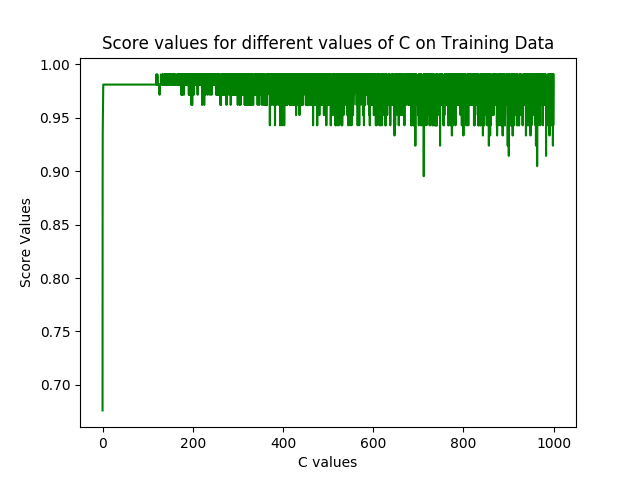

<IPython.core.display.Javascript object>


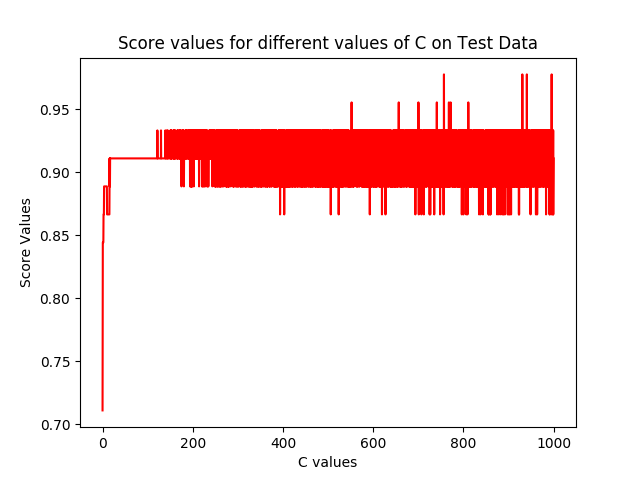

In [7]:
from sklearn.svm import LinearSVC #there is also a SVC
# here also we will try to find the best value for the C parameter.

c_values = np.arange(0.01, 1000, 0.2)
test_scores = []
train_scores = []

for c in c_values :
    model = LinearSVC(C=c)
    model.fit(X_train_transformed, y_train)
    test_scores.append(model.score(X_test_transformed, y_test))
    train_scores.append(model.score(X_train_transformed, y_train))
    
plt.figure()
plt.title("Score values for different values of C on Training Data")
plt.xlabel("C values")
plt.ylabel("Score Values")
plt.plot(c_values, train_scores, c='g')


plt.figure()
plt.title("Score values for different values of C on Test Data")
plt.xlabel("C values")
plt.ylabel("Score Values")
plt.plot(c_values, test_scores, c='r')


__From the above plots a C value of 465 might be reasonable, although I am not confident enough to make a 
conclusion on this value of C.__

*A final summary for the C value*

![C values](images/cparameter.png)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ -0.44209307  -9.97884359]
 [ -1.68183994   2.00730911]
 [ -2.66450371  18.05171457]]
[ 2.42621423  0.08195443 -9.99202632]


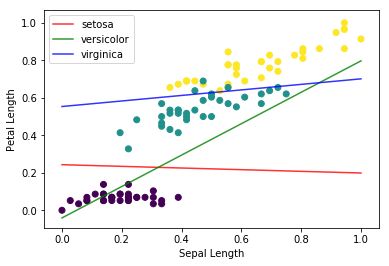

In [29]:
model = LinearSVC(C=465, random_state=0)

#Considering only the sepal length and petal as features
print(iris.feature_names)

# X_train_new = pd.DataFrame(X_train_transformed).iloc[:,[0,2]].as_matrix()
# X_test_new = pd.DataFrame(X_test_transformed).iloc[:,[0,2]].as_matrix()

X_train_new = X_train_transformed[:,[0,2]]
X_test_new = X_test_transformed[:,[0,2]]

model.fit(X_train_new, y_train)
print(model.coef_)
print(model.intercept_)

plt.figure()
plt.scatter(X_train_new[:,0], X_train_new[:,1], c=y_train)

x_0_range = np.linspace(0,1,10)

for w, b, color in zip(model.coef_, model.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0,(since -1 is one class and +1 is another class) to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)

plt.legend(iris.target_names)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

## 3. Kernalized Support Vector Machine
_______________________________________________

*In kernalized support vector machine a smaller dimension problem is projected onto a higher dimension and a linear model is fitted into this new projected space, which is than used for prediction.*

**Consider the following classification problem.**

![Need for using kernel 1](images/kernel1.png)



**Projecting onto a higer dimension, by adding a new feature obtained by squaring the old feature.**

![Need for using kernel 2](images/kernel2.png)



![Need for using kernel 3](images/kernel3.png)



![Need for using kernel 4](images/kernel4.png)



![Need for using kernel 5](images/kernel5.png)



![Radial basis Kernel](images/rbfkernel.png)



![SVC parameters](images/svcparameters.png)

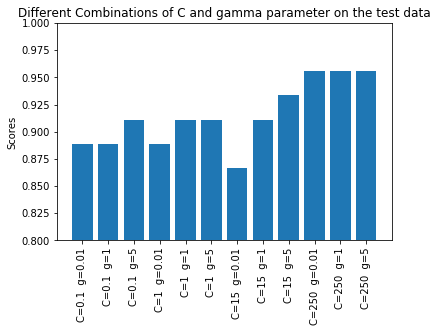

The optimal value combination for test data is C=250  g=0.01
The score is 0.955555555556


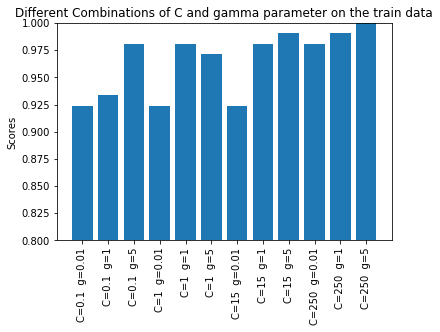

The training accuracy for C=250  g=0.01 is less, hence they are the optimal parameter values.


In [30]:
from sklearn.svm import SVC

# We will try to find the best value for the parameters gamma for a rbf kernel and the value of C parameter.

gamma_values = [0.01, 1, 5]
c_values = [0.1, 1, 15, 250]
test_scores = []
train_scores = []

x_ticks = []

for c in c_values :
    for g in gamma_values :
        model = SVC(kernel = 'rbf', gamma = g, C = c)
        model.fit(X_train_transformed, y_train)
        test_scores.append(model.score(X_test_transformed, y_test))
        train_scores.append(model.score(X_train_transformed, y_train))
        x_ticks.append("C=" + str(c) + "  g=" + str(g))

temp = range(len(x_ticks))

plt.figure()
plt.bar(temp, test_scores)
plt.xticks(temp, x_ticks, rotation=90)
plt.ylim(0.8, 1)
plt.ylabel('Scores')
plt.title('Different Combinations of C and gamma parameter on the test data')
plt.show()

print("The optimal value combination for test data is " + x_ticks[-3])
print("The score is " + str(test_scores[-3]))

plt.figure()
plt.bar(temp, train_scores)
plt.xticks(temp, x_ticks, rotation=90)
plt.ylim(0.8, 1)
plt.ylabel('Scores')
plt.title('Different Combinations of C and gamma parameter on the train data')
plt.show()

print("The training accuracy for C=250  g=0.01 is less, hence they are the optimal parameter values.")


# Cross Validation


![cross validation](images/crossvalidation.png)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
cv_scores = cross_val_score(model, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))


cv_scores = cross_val_score(model, X, y, cv = 5)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))


Cross-validation scores (3-fold): [ 0.98039216  0.98039216  1.        ]
Mean cross-validation score (3-fold): 0.987
Cross-validation scores (5-fold): [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
Mean cross-validation score (5-fold): 0.973


In [41]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=5)

print("Train scores : " , train_scores)
print("Test scores : " , test_scores)

Train scores :  [[ 0.925       0.925       0.93333333  0.925       0.9       ]
 [ 0.975       0.95833333  0.975       1.          0.95833333]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]]
Test scores :  [[ 0.86666667  0.96666667  0.83333333  0.96666667  0.93333333]
 [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
 [ 1.          0.9         0.86666667  0.96666667  0.96666667]
 [ 0.4         0.33333333  0.33333333  0.43333333  0.36666667]]


*The validation curve shows
the mean cross-validation
accuracy for
training and test
sets as a function of the
SVM parameter (gamma).*

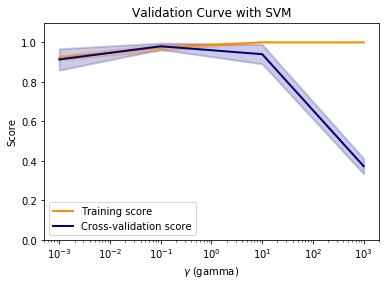

In [39]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

# Decision Trees

*It makes a tree based on yes/no questions.*
*The main problem of decision trees is that it overfits the data.*

![Decision trees](images/decisiontrees.png)

In [51]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
# don't set max_depth if you don't want pruning

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.93


In [50]:
print('Feature importances: {}'.format(clf.feature_importances_))

Feature importances: [ 0.          0.          0.02894737  0.97105263]
